In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

from keras.preprocessing.image import ImageDataGenerator

from keras.models import load_model
import pickle


In [54]:
model6 = load_model('CNN_Models/cnn_model_6.h5')


In [55]:
test_dir = 'Data/recordings'

In [56]:
test_data_gen_1 = ImageDataGenerator(rescale=1./255)

test_generator_1 = test_data_gen_1.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (160, 120),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    shuffle = False)

Found 1 images belonging to 10 classes.


In [57]:
_, test_acc = model6.evaluate(test_generator_1)

1/1 [==============================] - 0s 111ms/step - loss: 0.4937 - accuracy: 1.0000


In [58]:
predictions = model6.predict(test_generator_1)

1/1 [==============================] - 0s 61ms/step


In [59]:
# Predict probabilities for test set
predict_prob = model6.predict(test_generator_1, verbose=0)

In [60]:
predict_prob

array([[1.8910089e-01, 1.4061888e-02, 6.0835764e-02, 2.8960120e-03,
        6.8466775e-03, 9.9235345e-03, 5.9751044e-05, 3.6389697e-02,
        1.9816062e-03, 6.7790419e-01]], dtype=float32)

In [61]:
predict_results = np.argmax(predict_prob, axis=1)

In [62]:
true_labels = test_generator_1.classes

In [63]:
true_labels

array([9], dtype=int32)

In [64]:
predict_results = np.argmax(predict_prob, axis=1)

In [65]:
predict_results

array([9])

In [70]:
predicted_labels = [np.argmax(pred) for pred in predictions]

In [71]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jzackhammer', 'siren', 'street_music']

In [72]:
y_true_labeled = []
y_pred_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])

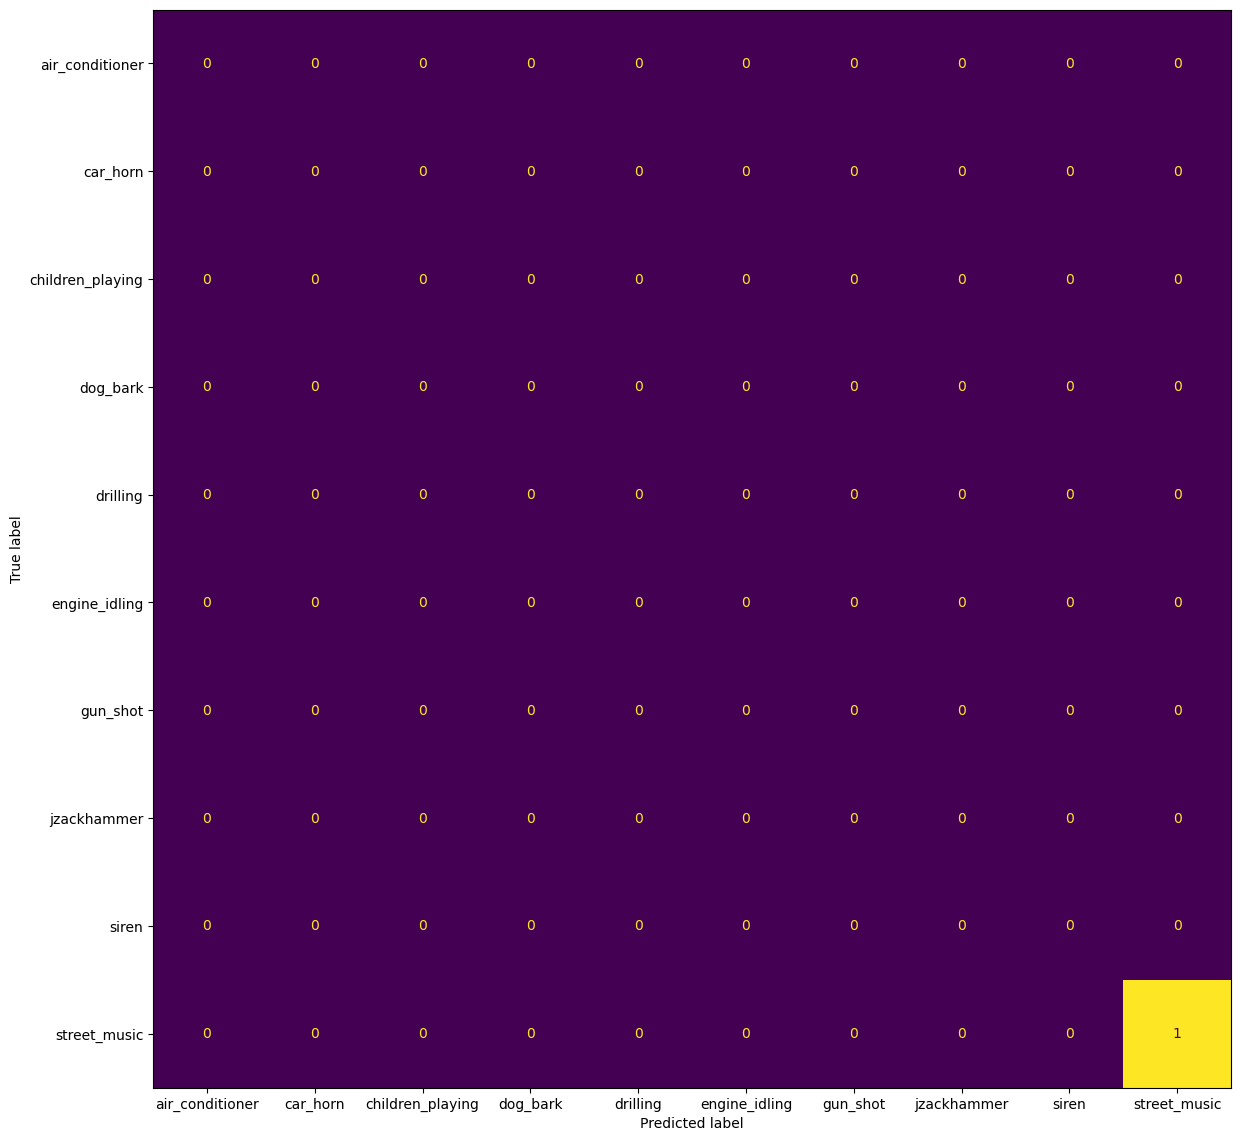

In [73]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax);

Accuracy: 1.0


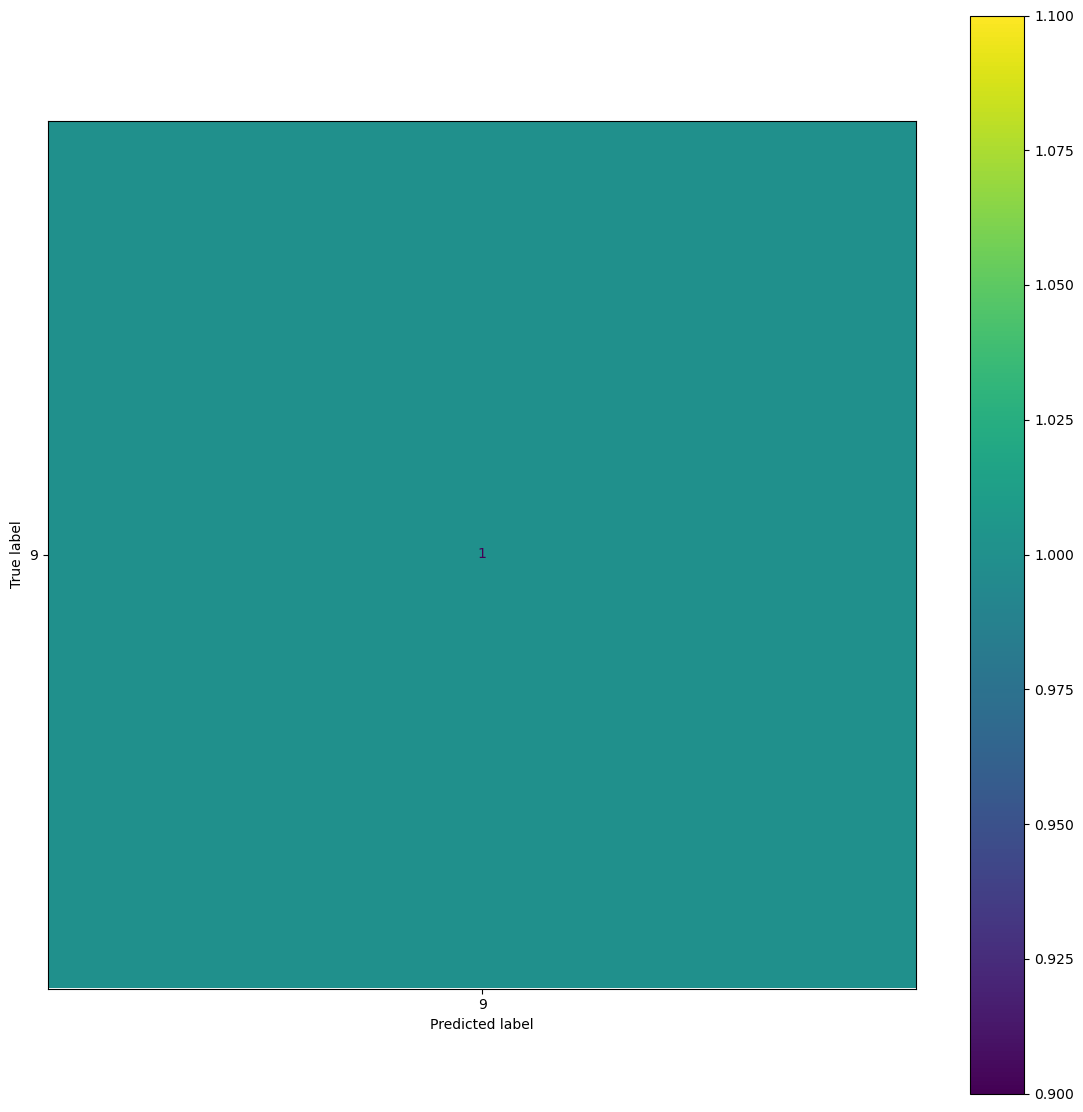

In [75]:
true_labels = test_generator_1.classes

predicted_labels = [np.argmax(pred) for pred in predictions]

accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);